In [137]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
customer_data = pd.read_csv(r"C:\Users\soham\Music\project MALL\Mall_Customers.csv")

In [139]:
print(customer_data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [140]:
x=customer_data.iloc[:,[3,4]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [141]:
f= customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [142]:
le = LabelEncoder()
customer_data['Gender'] = le.fit_transform(customer_data['Gender'])

In [143]:
pca = PCA(n_components=2)  # Reducing to 2 components
pca_f = pca.fit_transform(f)

In [155]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)  # Assuming 5 clusters
customer_data['Cluster'] = kmeans.fit_predict(pca_f)

C:\Users\soham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\soham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [145]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.45125272 0.44098465]


In [146]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(pca_f)


C:\Users\soham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\soham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [147]:
true_labels = customer_data['Gender']
predicted_labels = customer_data['Cluster']

Precision: 0.7800
Recall: 0.5000
F1 Score: 0.3590


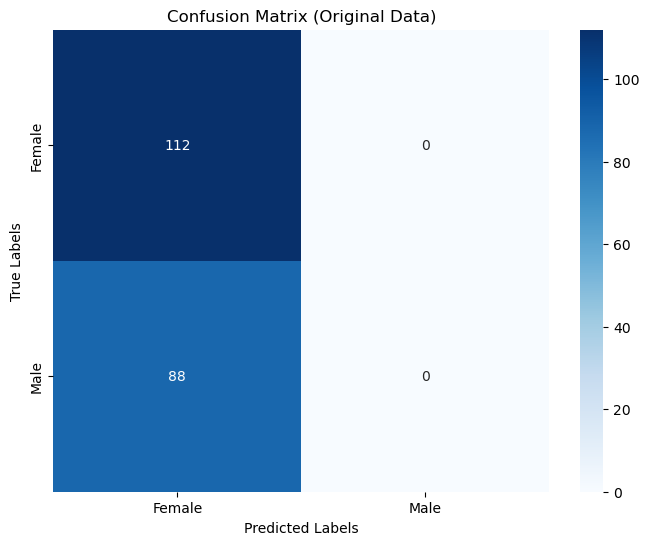

In [148]:
precision = precision_score(true_labels, predicted_labels, average='macro', zero_division=1)
recall = recall_score(true_labels, predicted_labels, average='macro', zero_division=1)
f1 = f1_score(true_labels, predicted_labels, average='macro', zero_division=1)

# Print Precision, Recall, and F1 Score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 4: Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix (Original Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [149]:
X_train, X_test, y_train, y_test = train_test_split(pca_f, customer_data['Cluster'], test_size=0.3, random_state=42)

In [150]:
knn = KNeighborsClassifier(n_neighbors=5)


In [151]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [152]:
y_pred = knn.predict(X_test)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

# Print evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Optionally, print a classification report for more detailed metrics
print(confusion_matrix(y_test, y_pred))

Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
[[60]]


Predicted Clusters for New Data: [0 4 2]
Precision (New Data): 0.2500
Recall (New Data): 0.5000
F1 Score (New Data): 0.2500


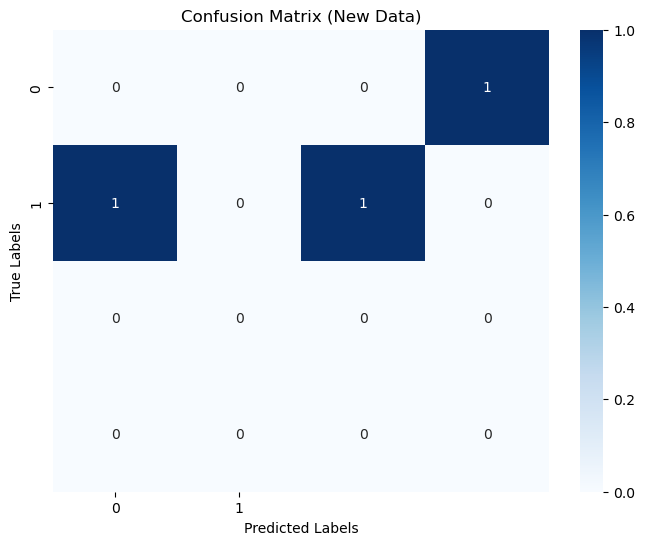

In [153]:
new_data = pd.DataFrame({
    'Age': [30, 45, 23],  # Example ages for new customers
    'Annual Income (k$)': [70, 120, 55],  # Example annual income for new customers
    'Spending Score (1-100)': [60, 30, 85]  # Example spending scores for new customers
})
new_data_pca = pca.transform(new_data)

# Use the trained KMeans model to predict clusters for new data
predicted_new_labels = kmeans.predict(new_data_pca)

# Print predicted labels for new data
print("Predicted Clusters for New Data:", predicted_new_labels)

# Step 6: Evaluation of new data performance (Precision, Recall, F1 Score)
# For evaluation, assume we have true labels for the new data (if available)
# Here, we randomly assume true labels (example: 0 and 1)
new_true_labels = np.array([1, 0, 1])  # Example true labels (0 = Male, 1 = Female)

# Calculate Precision, Recall, and F1 Score for new data
precision_new = precision_score(new_true_labels, predicted_new_labels, average='macro', zero_division=1)
recall_new = recall_score(new_true_labels, predicted_new_labels, average='macro', zero_division=1)
f1_new = f1_score(new_true_labels, predicted_new_labels, average='macro', zero_division=1)

# Print Precision, Recall, and F1 Score for new data
print(f"Precision (New Data): {precision_new:.4f}")
print(f"Recall (New Data): {recall_new:.4f}")
print(f"F1 Score (New Data): {f1_new:.4f}")

# Confusion Matrix for new data
conf_matrix_new = confusion_matrix(new_true_labels, predicted_new_labels)

# Plot Confusion Matrix for new data
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_new, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix (New Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()